<a href="https://colab.research.google.com/github/LeNovice/Assignments_WILP_SEM3/blob/main/GAM_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
#!pip install neo4j

In [202]:
#from neo4j import GraphDatabase , basic_auth 

In [203]:
!pip install networkx
!pip install decorator==5.0.9

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Assignment Q1

### (a)Create a random graph with 50 nodes, where nodes are connected with the probability of 0.8 

Ergos-Renyi Graph API will create a graph based on Bernoulli distribution with parameter p = 0.8

Thus, we can say that for a particular node, out of all the connections that are possible, 0.8 will be connected.

In other words, probability that there exists an edge between two nodes is 0.8

In [204]:
import networkx as nx
n = 50
p = 0.8
G_er = nx.erdos_renyi_graph(50, 0.8, seed=10)

### (b) Visualise the graph having node labels shown on the nodes.

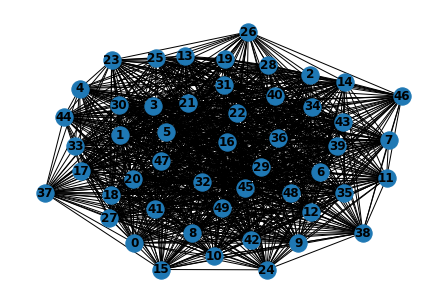

In [205]:
import matplotlib.pyplot as plt
nx.draw(G_er, with_labels=True, font_weight='bold')

### (c) Find eccentricity , radius, diameter for the graph.

Radius of GRAPH:

After eccentricity for all nodes is calculated, we find the node which has the minimum eccentricity. The value of it's eccentricity is the Radius of the graph.
This must be very well connected to all other nodes/vertices and must be the center somehow!. 

Here, We can conclude that every node is connected to every other node with a minimum hop of 2 edges

In [206]:
rad = nx.radius(G_er)
display("Radius of the Graph is")
display(rad)

'Radius of the Graph is'

2

Diameter of Graph:

Find the node with the maximum eccentricity and that value of eccentricity is the diameter of the graph.
This node must be at one end of the graph, far away from the action!

Here, We can conclude that every node is connected to every other node with a maximum hop of 2 edges

In [207]:
diam = nx.diameter(G_er)
display("Diameter of the Graph is")
display(diam)

'Diameter of the Graph is'

2

Eccentricity of a vertex:

Note that eccentricity is associated to the VERTEX and NOT to the Graph.
Basically, we take distance from that particular vertex to all other vertices in the graph and eccentricity is the maximum of those distances.

Here, We can conclude that every node is connected to every other node with a hop corresponding totheir Node ID

In [208]:
Ecc_dict = nx.eccentricity(G_er)
display("Eccentricity of all the nodes is as follows")
display(Ecc_dict)

'Eccentricity of all the nodes is as follows'

{0: 2,
 1: 2,
 2: 2,
 3: 2,
 4: 2,
 5: 2,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 2,
 15: 2,
 16: 2,
 17: 2,
 18: 2,
 19: 2,
 20: 2,
 21: 2,
 22: 2,
 23: 2,
 24: 2,
 25: 2,
 26: 2,
 27: 2,
 28: 2,
 29: 2,
 30: 2,
 31: 2,
 32: 2,
 33: 2,
 34: 2,
 35: 2,
 36: 2,
 37: 2,
 38: 2,
 39: 2,
 40: 2,
 41: 2,
 42: 2,
 43: 2,
 44: 2,
 45: 2,
 46: 2,
 47: 2,
 48: 2,
 49: 2}

### (d) Delete the node that has the highest eccentricity 

In [209]:
#Finding node with max eccentricity
Max_node = max(zip(Ecc_dict.values(), Ecc_dict.keys()))[1]


#for i in Ecc_dict:
#    if i[0] == diam:
#        #Take the first node with maximum eccentricity (same as diameter)
#        Max_node = key
#        break

In [210]:
Max_node

49

In [211]:
#removing max eccentricity node
G_er.remove_node(Max_node)
#nx.eccentricity(G_er)

### (e) Print the degree of all the nodes.

In [212]:
graph_deg = G_er.degree()
display(graph_deg)

DegreeView({0: 37, 1: 43, 2: 36, 3: 44, 4: 35, 5: 35, 6: 41, 7: 39, 8: 41, 9: 36, 10: 38, 11: 35, 12: 41, 13: 42, 14: 39, 15: 35, 16: 43, 17: 40, 18: 38, 19: 40, 20: 37, 21: 38, 22: 39, 23: 38, 24: 36, 25: 34, 26: 34, 27: 40, 28: 41, 29: 42, 30: 41, 31: 38, 32: 40, 33: 39, 34: 40, 35: 36, 36: 41, 37: 36, 38: 37, 39: 38, 40: 38, 41: 41, 42: 37, 43: 39, 44: 38, 45: 45, 46: 33, 47: 38, 48: 42})

### (f) Find the shortest path between the node that has the highest and the lowest degree in the graph.

Code to find nodes with highest and lowest degrees

In [213]:
max_deg = 0
min_deg = 50
Max_node = []
Min_node = []

for node,deg in graph_deg:
    if deg > max_deg:
        Max_node = [node, deg]
        max_deg = deg
    if deg < min_deg:
        Min_node = [node, deg]
        min_deg = deg
#check if Max and Min nide are separate nodes.
if Max_node[0] == Min_node[0]:
    print("Max and Min nodes are the same")
display(Max_node)
display(Min_node)

[45, 45]

[46, 33]

In [200]:
short_path = nx.shortest_path(G_er, source=Max_node[0], target=Min_node[0])
print("shortest path between " + str(Max_node[0]) + " and " + str(Min_node[0]) + " is " + str(len(short_path)))

shortest path between 45 and 46 is 2


# Assignment Q2

In [159]:
#!pip install snap-stanford
#import snap

Code to read the Butterfly similarity network

In [160]:
#nodetype applies to node ID. Not the edge values.
G_main = nx.read_weighted_edgelist(r"sample_data/SS-Butterfly_weights.tsv", comments='#', delimiter='\t', create_using= nx.DiGraph(), nodetype=int, encoding='utf-8')

Checking if edges are correctly inducted

In [161]:
display(G_main.get_edge_data(0,4))
display(G_main.get_edge_data(0,1))

{'weight': 0.029663}

None

In [162]:
#nx.draw_networkx(G_similarity)
print(nx.info(G_main))

DiGraph with 832 nodes and 86528 edges


In [163]:
nx.is_directed_acyclic_graph(G_main)

True

### Identify the largest weakly connected component

Nodes printed by following cell are weakly connected, in the sense that, the directed graph may not have a "from-to" path connections in terms of direction, however the underlying graph (after removing dimensions) is connected

In [164]:
display("Largest Weakly connected component in the graph is:")
largest_wcc = max(nx.weakly_connected_components(G_main), key=len)
display(largest_wcc)

'Largest Weakly connected component in the graph is:'

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


Creating a subgraph of the weakly connected component for further assignment questions

In [165]:
#Extract the weakly connected subgraph 
G_similarity = G_main.subgraph(largest_wcc)
#Check if it is also directed acyclic
nx.is_directed_acyclic_graph(G_similarity)

True

### (a) Compute the degree distribution and display it graphically.

In [166]:
node_degree_view = G_similarity.degree()
#seems like the display of Degree Viw is based on which nodes are found first.
#Because after 0's degree we have 4's degree. Just like the connections.
display(node_degree_view)

DiDegreeView({0: 56, 4: 67, 5: 66, 7: 176, 10: 72, 12: 189, 13: 63, 14: 191, 16: 82, 17: 96, 24: 88, 25: 64, 27: 117, 28: 57, 30: 117, 31: 56, 32: 283, 33: 91, 35: 148, 37: 80, 42: 76, 43: 96, 45: 60, 46: 104, 48: 86, 59: 271, 60: 132, 67: 57, 72: 60, 73: 76, 74: 55, 77: 90, 78: 223, 79: 59, 81: 176, 134: 201, 138: 243, 142: 127, 145: 99, 149: 85, 154: 150, 178: 456, 184: 213, 200: 355, 330: 299, 333: 331, 361: 461, 405: 254, 517: 109, 542: 203, 554: 177, 557: 242, 564: 162, 571: 434, 582: 166, 583: 71, 593: 114, 1: 60, 2: 68, 3: 65, 18: 71, 21: 45, 26: 100, 34: 40, 36: 224, 39: 115, 44: 114, 52: 91, 55: 78, 71: 306, 80: 60, 126: 81, 157: 244, 168: 76, 174: 251, 181: 75, 235: 414, 325: 95, 356: 208, 411: 290, 444: 386, 516: 34, 551: 171, 570: 389, 587: 136, 608: 81, 632: 261, 642: 53, 653: 269, 660: 321, 678: 229, 701: 259, 703: 314, 722: 385, 748: 105, 755: 353, 770: 336, 788: 310, 812: 286, 827: 401, 6: 40, 9: 73, 19: 78, 38: 46, 41: 37, 49: 44, 51: 42, 54: 33, 63: 46, 75: 44, 175: 9

In [167]:
node_degree_list = list(node_degree_view)
node_degree_list.sort(key = lambda x:x[1])
display(node_degree_list)

[(54, 33),
 (516, 34),
 (530, 34),
 (171, 34),
 (41, 37),
 (40, 37),
 (56, 37),
 (618, 38),
 (108, 39),
 (34, 40),
 (6, 40),
 (167, 40),
 (83, 41),
 (656, 41),
 (51, 42),
 (20, 42),
 (61, 42),
 (109, 42),
 (135, 42),
 (53, 43),
 (133, 43),
 (182, 43),
 (96, 43),
 (104, 43),
 (49, 44),
 (75, 44),
 (57, 44),
 (68, 44),
 (628, 44),
 (170, 44),
 (173, 44),
 (111, 44),
 (21, 45),
 (615, 45),
 (38, 46),
 (63, 46),
 (675, 46),
 (94, 46),
 (98, 46),
 (127, 46),
 (76, 47),
 (654, 47),
 (84, 47),
 (86, 47),
 (93, 47),
 (160, 47),
 (123, 48),
 (220, 48),
 (513, 48),
 (69, 49),
 (128, 49),
 (124, 49),
 (218, 49),
 (166, 49),
 (89, 50),
 (47, 51),
 (164, 51),
 (112, 51),
 (645, 51),
 (634, 51),
 (544, 52),
 (642, 53),
 (11, 53),
 (29, 53),
 (382, 53),
 (433, 53),
 (122, 53),
 (130, 53),
 (635, 53),
 (719, 54),
 (62, 54),
 (102, 54),
 (103, 54),
 (550, 54),
 (614, 54),
 (74, 55),
 (272, 55),
 (95, 55),
 (0, 56),
 (31, 56),
 (598, 56),
 (100, 56),
 (91, 56),
 (648, 56),
 (28, 57),
 (67, 57),
 (110, 5

 Finding the counts of each degree that the nodes in the graph have

In [168]:
#Calculate the degree distribution
import collections
import matplotlib.pyplot as plt

In [169]:
deg_seq = sorted([d for n,d in node_degree_list], reverse=True)
#display(deg_seq)

Collectiong degree and its count

In [170]:
degCnt = collections.Counter(deg_seq)
#display(deg_seq)
deg, cnt = zip(*degCnt.items())
#Note here, degCnt.items() presents a list of tuples.
#*degCnt.items() presents individual tuples, (no idea in which form)

In [171]:
#display(deg)
#display(cnt)

Plotting the histogram

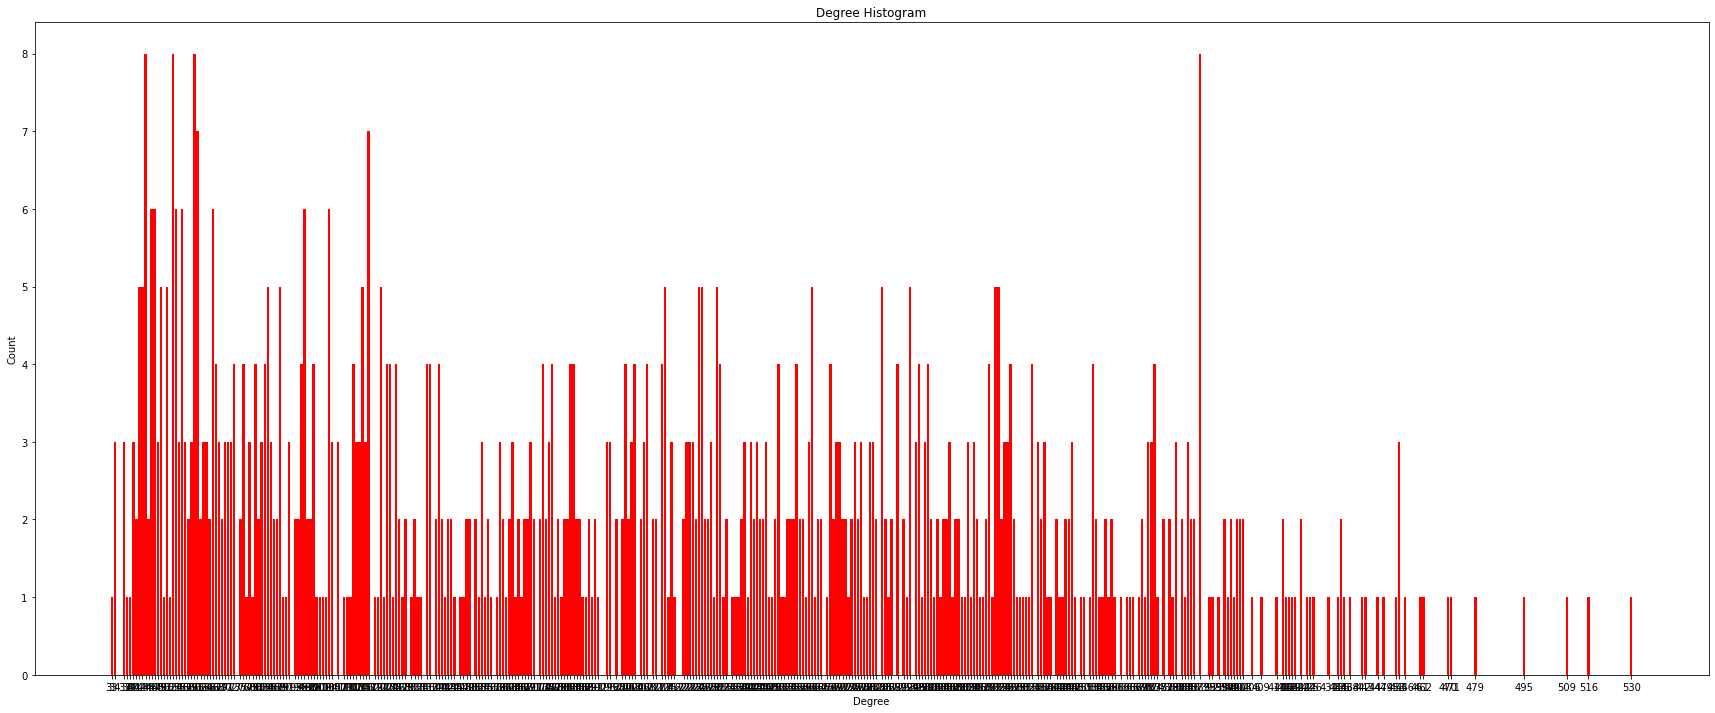

In [172]:
fig,ax = plt.subplots(figsize=(30,12))
plt.bar(deg, cnt, color='r')

#plt.rcParams["figure.figsize"] = (30,18)

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)

#plt.axes([0.4, 0.4, 0.5, 0.5])
#plt.axes("off")
plt.show()

Identify the top 5 butterfly that has the most similarity with other birds

Below cell will return a dict of dict data structure.

For every node, we will have a dict structure which has other nodes as key and the similarity as the values.

In [173]:
similar_dict = nx.simrank_similarity(G_similarity)

Now finding top 5 similarity values and collecting the corresponding nodes

Except the nodes which are similar to itself

In [174]:
from networkx.classes.function import is_empty
#display(similar_dict)
top5_sim_list = [[0,0,0],[0,0,0],[0,0,0],[0,0,0],[0,0,0]]
for src_node, target_nodes_dict in similar_dict.items():
    temp_list = [(k, v) for k, v in target_nodes_dict.items()]#target_nodes_dict.items()
    temp_list.sort(key = lambda x:x[1], reverse=True)
    i=0
    j=0
    #print("src_node = " + str(src_node))
    while(temp_list[i][1] > top5_sim_list[j][-1]):
        if(temp_list[i][1] != 1):
            #Replace top5_sim_list entry with this
            top5_sim_list[j] = [src_node, temp_list[i][0], temp_list[i][1]]
            j = j+1
            if (j>5):
                print("top5_sim_list overflow")
                break
        top5_sim_list.sort(key = lambda x:x[-1])
        i = i + 1
        if(i>5):
            #display(top5_sim_list)
            break
display(top5_sim_list)
top_5_sim_nodes = [x for x,y,z in top5_sim_list]
display("Nodes with the highest similarity with other nodes:")
display(top_5_sim_nodes)

[[3, 6, 0.48790860692017995],
 [84, 87, 0.7031321196084219],
 [87, 84, 0.7031321196084219],
 [92, 83, 0.9],
 [83, 92, 0.9]]

'Nodes with the highest similarity with other nodes:'

[3, 84, 87, 92, 83]

### (b) Compute Pagerank (consider each bird as a node ) for all nodes

In [175]:
pr = nx.pagerank(G_similarity, alpha=0.85, max_iter=100, tol=1e-06, weight='weight')

In [176]:
pr

{0: 0.0002529074059419881,
 1: 0.0002529074059419881,
 2: 0.00025428065220474264,
 3: 0.0002883127224447665,
 4: 0.00025875745923163013,
 5: 0.0002737871228547127,
 6: 0.00025903537487393155,
 7: 0.0002582461200630738,
 8: 0.00025488720718417636,
 9: 0.0002599073310145327,
 10: 0.0002736308653387244,
 11: 0.0002732320416533784,
 12: 0.00027395159865302356,
 13: 0.000298815657235718,
 14: 0.0002899033917908043,
 15: 0.0002637359825424407,
 16: 0.0002989368298774467,
 17: 0.0003013136191349168,
 18: 0.0002870517923938178,
 19: 0.00027970519988071256,
 20: 0.0002854600831089097,
 21: 0.0003029006827938959,
 22: 0.00028283169606360263,
 23: 0.0002997205386545406,
 24: 0.0003264352833234115,
 25: 0.00034415637532194245,
 26: 0.0003553371644526611,
 27: 0.00031919955599776757,
 28: 0.00033913069220601954,
 29: 0.0003370555600993996,
 30: 0.0003182802627892957,
 31: 0.0003963441033050828,
 32: 0.0003564375827195503,
 33: 0.00040374047967262815,
 34: 0.00032249738440000893,
 35: 0.000330903373

In [177]:
#import numpy as np
#rank_vec = np.array(pr.values())
#display(pr.values)
#best_node = np.argmax(rank_vec)


Node having highest page rank

In [178]:
pr_list = list(pr.items())
pr_list.sort(key = lambda x:x[1], reverse=True)
print("Butterfly which is similar to maximum other butterflies is {}".format(pr_list[0][0]) + " with a page rank of {}".format(pr_list[0][-1]))

Butterfly which is similar to maximum other butterflies is 831 with a page rank of 0.06994680966773098


In [179]:
top_10_pr = pr_list[:10]
top_10_pr_nodes = [n for n,v in top_10_pr]
display("Top 10 nodes with highest page rank")
display(top_10_pr_nodes)

[831, 830, 828, 829, 827, 825, 824, 823, 822, 821]

In [180]:
least_10_pr = pr_list[-10:]
least_10_pr_nodes = [n for n,v in least_10_pr]
display("Bottom 10 nodes with lowest page rank")
display(least_10_pr_nodes)

[4, 7, 82, 236, 420, 8, 2, 83, 0, 1]

In [44]:
#group_betweenness_centrality(G_similarity, C, normalized=True, weight=None, endpoints=False)
#bet_centr = nx.betweenness_centrality_subset(G_similarity, top_10_pr_nodes, G_similarity.nodes, weight='weight')

    Another way of looking at centrality is by considering how important nodes are in connecting other nodes (betweenness)

Betweenness centrality can reflect a unit's capacity to broker or control social relations involving other units.

In [181]:
C_betw = nx.betweenness_centrality(G_similarity, normalized=True, weight='weight')

In [182]:
display(C_betw)

{0: 0.0,
 1: 0.0,
 2: 5.6543864990648516e-05,
 3: 1.7398112304814928e-05,
 4: 5.9443550374784335e-05,
 5: 0.0001478839545909269,
 6: 0.0,
 7: 0.00021820132515622053,
 8: 0.0003494120887883665,
 9: 0.00011888710074956867,
 10: 1.7398112304814928e-05,
 11: 2.899685384135821e-05,
 12: 0.0003117161787946008,
 13: 1.4498426920679106e-06,
 14: 0.000340713032635959,
 15: 0.0,
 16: 3.189653922549403e-05,
 17: 0.0001928290780450321,
 18: 0.0005871862902875037,
 19: 0.0001478839545909269,
 20: 1.8847954996882837e-05,
 21: 0.0004523509199251881,
 22: 0.0001899293926608963,
 23: 0.00044365186377278066,
 24: 8.409087613993881e-05,
 25: 0.0001667319095878097,
 26: 0.0002609716845722239,
 27: 0.0006451799979702202,
 28: 0.00016818175227987763,
 29: 7.974134806373508e-05,
 30: 9.134008960027837e-05,
 31: 1.7398112304814928e-05,
 32: 0.0006466298406622882,
 33: 0.0008061125367897583,
 34: 7.249213460339553e-06,
 35: 0.0012838357038261348,
 36: 0.0007046235483450045,
 37: 0.00016093253881953808,
 38: 1.

Closeness centrality measures each individual’s position in the network via a different perspective from the other network metrics, capturing the average distance between each vertex and every other vertex in the network.

In [183]:
C_close = nx.closeness_centrality(G_similarity, distance='weight', wf_improved=True)

In [184]:
display(C_close)

{0: 0.0,
 1: 0.0,
 2: 0.07865159702067752,
 3: 0.006046163507388278,
 4: 0.18419154852735867,
 5: 0.05615161013798723,
 6: 0.057246060340438894,
 7: 0.07780070478102448,
 8: 0.29226237044322256,
 9: 0.1365627294987347,
 10: 0.13591782452628282,
 11: 0.09612050863128346,
 12: 0.15515295659582695,
 13: 0.1519861618119532,
 14: 0.23722942788828927,
 15: 0.12738462796829686,
 16: 0.18404982988382215,
 17: 0.2627314152755975,
 18: 0.6304978127550913,
 19: 0.5024570959262584,
 20: 0.27318090058533473,
 21: 0.30154083513733393,
 22: 0.4503792473600875,
 23: 0.29005446015200215,
 24: 0.1790221536817259,
 25: 0.6730162619587367,
 26: 0.3985932178330946,
 27: 0.5497247352338768,
 28: 0.5027452262000185,
 29: 0.7109998941573937,
 30: 0.5919471513750109,
 31: 0.6053698510569687,
 32: 0.6047008398051602,
 33: 0.8575713208343488,
 34: 0.559765721736708,
 35: 0.9079869758693783,
 36: 0.9301451741126829,
 37: 0.9172433104999482,
 38: 0.8348670891787283,
 39: 0.9137134211837402,
 40: 0.9060565861825121

Eigenvector centrality measures a node’s importance while giving consideration to the importance of its neighbors.

In [187]:
C_eigen = nx.eigenvector_centrality(G_similarity, max_iter=1000, weight='weight')

In [188]:
display(C_eigen)

{0: 6.6940289894732555e-183,
 1: 6.6940289894732555e-183,
 2: 9.887080817451981e-182,
 3: 3.709440134372706e-179,
 4: 3.1928110897471377e-178,
 5: 1.8118111922928353e-176,
 6: 6.406656714054287e-178,
 7: 2.2977157213617236e-175,
 8: 1.067079104258455e-174,
 9: 2.670045430485409e-173,
 10: 1.9727795054029913e-172,
 11: 6.752662089063937e-172,
 12: 5.461067008187728e-171,
 13: 4.70378024912789e-170,
 14: 8.1954694435782e-169,
 15: 7.805206407505329e-168,
 16: 1.0837875151548525e-167,
 17: 1.1332402226299188e-166,
 18: 2.450351721056258e-166,
 19: 2.868036346065373e-166,
 20: 9.002941580384563e-166,
 21: 6.539530405342415e-165,
 22: 1.9210316983665664e-165,
 23: 6.640051116117552e-164,
 24: 3.281699296516019e-165,
 25: 3.570565553354338e-164,
 26: 8.726640648367045e-163,
 27: 1.4228634789056666e-163,
 28: 5.192695178067017e-162,
 29: 7.841554681507036e-162,
 30: 9.960013515531233e-162,
 31: 2.0593376966577147e-160,
 32: 9.489058518482575e-160,
 33: 3.332980862305796e-159,
 34: 4.639626389

In [189]:
C_betw_top10 = list()
C_betw_least10 = list()
C_close_top10 = list()
C_close_least10 = list()
C_eigen_top10 = list()
C_eigen_least10 = list()
for n,v in top_10_pr:
    C_betw_top10.append(C_betw[n])
    C_close_top10.append(C_close[n])
    C_eigen_top10.append(C_eigen[n])
for n,v in least_10_pr:
    C_betw_least10.append(C_betw[n])
    C_close_least10.append(C_close[n])
    C_eigen_least10.append(C_eigen[n])

In [195]:
display("Centrality measures for top 10 and least 10 according to Page rank:")
print("Betweenness\nTop10\t\t\t\tLeast10")
for i in range(len(C_betw_top10)):
    print(str(C_betw_top10[i]) +"\t\t"+str(C_betw_least10[i]))
print("\nCloseness\nTop10\t\t\t\tLeast10")
for i in range(len(C_betw_top10)):
    print(str(C_close_top10[i]) +"\t\t"+str(C_close_least10[i]))
print("\nEigen centrality\nTop10\t\t\t\tLeast10")
for i in range(len(C_betw_top10)):
    print(str(C_eigen_top10[i]) +"\t\t"+str(C_eigen_least10[i]))

'Centrality measures for top 10 and least 10 according to Page rank:'

Betweenness
Top10				Least10
0.0		5.9443550374784335e-05
0.0		0.00021820132515622053
4.349528076203732e-06		0.0016789178374146405
4.349528076203732e-06		5.074449422237687e-05
8.699056152407464e-06		4.349528076203732e-06
1.4498426920679106e-06		0.0003494120887883665
1.5948269612747015e-05		5.6543864990648516e-05
8.699056152407464e-06		0.0002609716845722239
2.899685384135821e-06		0.0
0.00010438867382888957		0.0

Closeness
Top10				Least10
27.356920818013467		0.18419154852735867
24.958670959344108		0.07780070478102448
28.7447189855912		1.3425127649296187
27.978460677346213		4.344005578360045
28.187643834115224		6.9666871014394545
26.150350811307867		0.29226237044322256
26.26550045428339		0.07865159702067752
25.945101622807393		1.1208363443812315
27.077642048848592		0.0
27.88126062696694		0.0

Eigen centrality
Top10				Least10
0.910392194613652		3.1928110897471377e-178
0.3525690415675766		2.2977157213617236e-175
0.11710239359824112		2.7978819182047915e-138
0.16996799343051128		1.0617317165

From Above tables, we can see that


1.   The top 10 nodes w.r.t. Page rank have a low value of Betweenness Centrality as compared to least 10 nodes w.r.t. page rank. PageRank’s main difference from EigenCentrality is that it accounts for link direction. We cannot conclude that a node has high betweenness centrality just because it has high page rank
2.   The top 10 nodes w.r.t Page rank have significantly high closeness centrality. This is expected because having a high page rank also means that many nodes have links pointed at that node which means that  it is close to a large number of nodes
3.   The top 10 nodes w.r.t Page rank have significantly high Eigen centralities as compared to least 10 nodes w.r.t. page rank. Naturally, for a node with high page rank, a lot of 'importance' will be associated to it. Eigen centrality is a measure of importance which reflects this idea.
 

